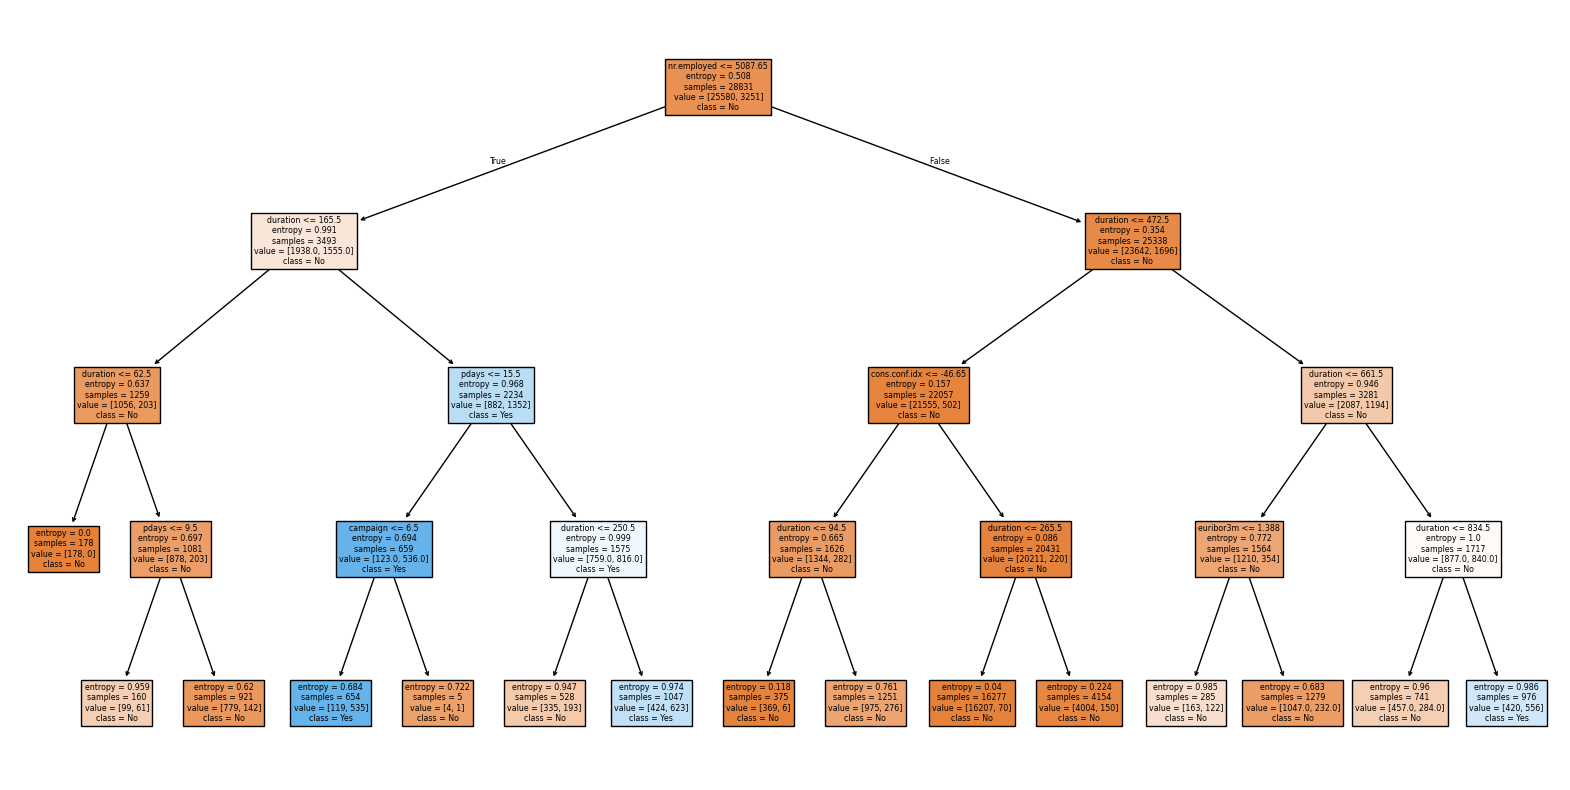

[[10571   397]
 [  676   713]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     10968
           1       0.64      0.51      0.57      1389

    accuracy                           0.91     12357
   macro avg       0.79      0.74      0.76     12357
weighted avg       0.91      0.91      0.91     12357



In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


data = pd.read_csv('bank-additional-full.csv', sep=';')


data['y'] = data['y'].map({'yes': 1, 'no': 0})


X = data.drop('y', axis=1)
y = data['y']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))